**6) 126<=Rollnumber + All with No RollNumbers:**
  #Task 1: Try the algo on Same Whether dataset - LabelEncoding of features:and Train test Division 95%-5%

  #Task 2: Apply algorithm on wine dataset - LabelEncoding of features: and Train test Division 66%-34%
  


**Instruction for Task-1 & 2:**

i) Set Random state and maximum allowed leaf of model equals to your roll number (or last 2 digit of your id -if you don't have roll number)


**Questions: For Task - 1**

(1) What will be the value of Play, if Outlook is ’Rainy’, Temperature is ’Mild’, Humidity =’Normal’, and Wind = ’False’?

(2) What will be the value of Play, if Outlook is ’Sunny’, Temeprature is ’Cool’, Humidity =’High’, and Wind = ’True’?

(3) Accuracy , precision and recall of both Models?


In [1]:
# Step 1: Import necessary libraries
from sklearn import preprocessing,tree,metrics
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
# Step 2: Prepare dataset.
#Predictor variables
Outlook = ['Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Sunny', 'Overcast',
            'Rainy', 'Rainy', 'Sunny', 'Rainy','Overcast', 'Overcast', 'Sunny']
Temperature = ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool',
                'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild']
Humidity = ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal',
            'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High']
Wind = ['False', 'True', 'False', 'False', 'False', 'True', 'True',
            'False', 'False', 'False', 'True', 'True', 'False', 'True']

#Class Label:
Play = ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No',
'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']

In [3]:
# Step 3: Digitize the data set using encoding
#creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
Outlook_encoded = le.fit_transform(Outlook)
Outlook_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Outllok mapping:",Outlook_name_mapping)

Temperature_encoded = le.fit_transform(Temperature)
Temperature_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Temperature mapping:",Temperature_name_mapping)

Humidity_encoded = le.fit_transform(Humidity)
Humidity_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Humidity mapping:",Humidity_name_mapping)

Wind_encoded = le.fit_transform(Wind)
Wind_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Wind mapping:",Wind_name_mapping)

Play_encoded = le.fit_transform(Play)
Play_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Play mapping:",Play_name_mapping)

print("\n\n")
print("Weather:" ,Outlook_encoded)
print("Temerature:" ,Temperature_encoded)
print("Humidity:" ,Humidity_encoded)
print("Wind:" ,Wind_encoded)
print("Play:" ,Play_encoded)

Outllok mapping: {'Overcast': 0, 'Rainy': 1, 'Sunny': 2}
Temperature mapping: {'Cool': 0, 'Hot': 1, 'Mild': 2}
Humidity mapping: {'High': 0, 'Normal': 1}
Wind mapping: {'False': 0, 'True': 1}
Play mapping: {'No': 0, 'Yes': 1}



Weather: [1 1 0 2 2 2 0 1 1 2 1 0 0 2]
Temerature: [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Humidity: [0 0 0 0 1 1 1 0 1 1 1 0 1 0]
Wind: [0 1 0 0 0 1 1 0 0 0 1 1 0 1]
Play: [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [4]:
# Step 4: Merge different features to prepare dataset

features = tuple(zip(Outlook_encoded,Temperature_encoded,Humidity_encoded,Wind_encoded))
print("Features :-",features)

Features :- ((1, 1, 0, 0), (1, 1, 0, 1), (0, 1, 0, 0), (2, 2, 0, 0), (2, 0, 1, 0), (2, 0, 1, 1), (0, 0, 1, 1), (1, 2, 0, 0), (1, 0, 1, 0), (2, 2, 1, 0), (1, 2, 1, 1), (0, 2, 0, 1), (0, 1, 1, 0), (2, 2, 0, 1))


In [5]:

train_data,test_data,train_label,test_label = train_test_split(features,Play_encoded,random_state=128,test_size=0.05)
print("[Features,Label]\nLength of Train Set:",len(train_data),len(train_label))
print("\nLength of Test Set:",len(test_data),len(test_label))

[Features,Label]
Length of Train Set: 13 13

Length of Test Set: 1 1


In [6]:
# Step 5: Train ’Create and Train DecisionTreeClassifier’

#Create a Decision Tree Classifier (using Entropy)

entropy = DecisionTreeClassifier(criterion='entropy',max_leaf_nodes=128)
entropy.fit(train_data,train_label)

target_pred = entropy.predict(test_data)
# Train the model using the training sets


In [7]:
# Step 6: Predict Output for new data

#Predict Output
# (1) What will be the value of Play, if Outlook is ’Rainy’, Temperature is ’Mild’, Humidity =’Normal’, and Wind = ’False’?
# (2) What will be the value of Play, if Outlook is ’Sunny’, Temeprature is ’Cool’, Humidity =’High’, and Wind = ’True’?


predicted = entropy.predict([[1,2,1,0],[2,0,0,1]])
print("Predicted values :-",predicted)

Predicted values :- [1 0]


[Text(111.60000000000001, 195.696, 'X[0] <= 0.5\nentropy = 0.961\nsamples = 13\nvalue = [5, 8]'),
 Text(74.4, 152.208, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(148.8, 152.208, 'X[2] <= 0.5\nentropy = 0.991\nsamples = 9\nvalue = [5, 4]'),
 Text(74.4, 108.72, 'X[0] <= 1.5\nentropy = 0.722\nsamples = 5\nvalue = [4, 1]'),
 Text(37.2, 65.232, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(111.60000000000001, 65.232, 'X[3] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(74.4, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(148.8, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(223.20000000000002, 108.72, 'X[0] <= 1.5\nentropy = 0.811\nsamples = 4\nvalue = [1, 3]'),
 Text(186.0, 65.232, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(260.40000000000003, 65.232, 'X[3] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(223.20000000000002, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(297.6, 21.744, 'entropy = 0

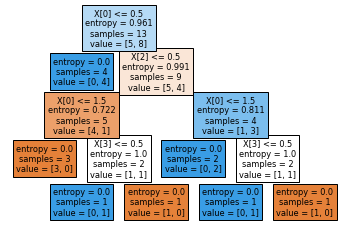

In [8]:
tree.plot_tree(entropy,filled=True)

In [9]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(test_label, target_pred))
print("\nPrecision:",metrics.precision_score(test_label,target_pred,average='micro'))
print("\nRecall:",metrics.recall_score(test_label,target_pred,average='micro'))

Accuracy: 1.0

Precision: 1.0

Recall: 1.0


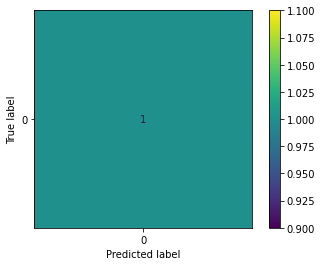

In [10]:
metrics.plot_confusion_matrix(entropy,test_data,test_label)